In [1]:
import os, sys
import xarray as xa
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from pylibs.plot_utils import set_size, setupax_2dmap

In [18]:
# iodafile = '/glade/work/swei/projects/caliop_opr/JEDI-METplus/output/test_gcafs/hofx/f12/hofx.modis_aqua_aod.2023101312.nc4'
iodafile = '/glade/work/swei/projects/caliop_opr/JEDI-METplus/output/test_gcafs/hofx/f12/new.hofx.modis_aqua_aod.2023101312.nc4'

In [19]:
meta_ds = xa.open_dataset(iodafile, group='MetaData')
lats = meta_ds.latitude.data
lons = meta_ds.longitude.data

obsv_ds = xa.open_dataset(iodafile, group='ObsValue')
hofx_ds = xa.open_dataset(iodafile, group='hofx')

In [20]:
# area corner [lats.min(), lats.max(), lons.min(), lons.max()]
# area_corner = [-90., 90., -150., 0.] # original cut
# area_corner = [15., 16., -26., -25.] # EAtl
# area_corner = [-40., 10., -90., -30.] # SAmer
# area_corner = [20., 60., -130., -50.] # NAmer
area_corner = [-90., 90., -180., 180.]
# area_corner = [df['Lat'].min()-1., df['Lat'].max()+1, df['Lon'].min()-1, df['Lon'].max()+1]
# area_mask = (lats > area_corner[0])&(lats < area_corner[1])&(lons > area_corner[2])&(lons < area_corner[3])
area = 'Glb'

In [21]:
proj = ccrs.PlateCarree()

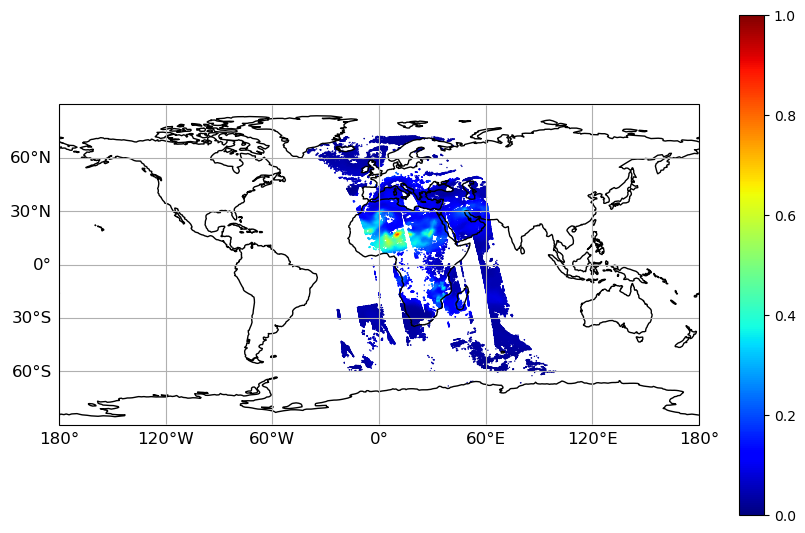

In [22]:
fig, ax, gl = setupax_2dmap(area_corner, area, proj, lbsize=12)
set_size(8, 5)
sc = ax.scatter(lons, lats, c=hofx_ds['aerosolOpticalDepth'].values, s=1, cmap='jet', edgecolors='None', vmax=1, vmin=0.)
plt.colorbar(sc)


In [81]:
fig.savefig(pltsavedir + '/' + pltname, dpi=600)